In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow
tensorflow.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

In [ ]:
# 이미지 처리
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
# json 파일 처리
import json

In [ ]:
# 파일 존재 여부 확인용
import os

In [ ]:
# 모델
from tensorflow import keras

In [ ]:
# 랜덤숫자 생성
import random

# 변수 목록

In [ ]:
os.chdir('/content/drive/MyDrive/[perst]데이터셋/MachineLearningProject/02_Fashion Type Classification Model')

In [ ]:
train_dir_name = "./Dataset/Train-Test/Female/Train/"
test_dir_name = "./Dataset/Train-Test/Female/Test/"

img_width = 200
img_height = 200

model_dir_name = './Model/' # 학습 모델이 저장될 디렉토리명

# 베이스 모델 설정

In [ ]:
base_model_path = model_dir_name + 'fashion_classification_female_0123_03.keras'

# 축적된 이미지 데이터 불러오기

In [ ]:
img_original = []
label_original = []
fe_original = []

for i in range(0, 8001):
    img_path = train_dir_name + "Image/" + str(i) + ".jpg"
    label_path = train_dir_name + "Json/" + str(i) + ".json"
    feature_path = train_dir_name + "Feature/" + str(i) + ".npy"

    if not os.path.isfile(img_path):
        continue
    if not os.path.isfile(label_path):
        continue
    if not os.path.isfile(feature_path):
        continue

    # 이미지 파일 로드
    img_file = cv2.imread(img_path)
    if img_file is None:
        print(str(i) + ".jpg File Load Failed!!")
        break
    img_rgb = cv2.cvtColor(img_file, cv2.COLOR_BGR2RGB)

    # json 파일 로드
    with open(label_path, "r") as loadfile:
      label_file = json.load(loadfile)
    if label_file is None:
        print(str(i) + ".json File Load Failed!!")
        break

    # feature 파일 로드
    feature_file = np.load(feature_path)
    if feature_file is None:
        print(str(i) + ".npy File Load Failed!!")
        break


    img_original.append(img_rgb)
    label_original.append(label_file)
    fe_original.append(feature_file)


    if len(fe_original)%500 == 0: # 진행도 확인용
        print(str(len(fe_original)) + "개 파일 읽기 완료")


print("Complete")


500개 파일 읽기 완료
1000개 파일 읽기 완료
1500개 파일 읽기 완료
2000개 파일 읽기 완료
2500개 파일 읽기 완료
3000개 파일 읽기 완료
3500개 파일 읽기 완료
4000개 파일 읽기 완료
4500개 파일 읽기 완료
5000개 파일 읽기 완료
5500개 파일 읽기 완료
6000개 파일 읽기 완료
6500개 파일 읽기 완료
7000개 파일 읽기 완료
7500개 파일 읽기 완료
8000개 파일 읽기 완료
Complete


# 랜덤 Test 데이터 불러오기

In [ ]:
rand_num = random.randint(1, 2000)
img_path = test_dir_name + "Image/" + str(rand_num) + ".jpg"
label_path = test_dir_name + "Json/" + str(rand_num) + ".json"

# 이미지 파일 로드
img_bgr = cv2.imread(img_path)
if img_bgr is None:
  print(str(rand_num) + ".jpg File Load Failed!!")
img_test = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# json 파일 로드
with open(label_path, "r") as loadfile:
  label_test = json.load(loadfile)
  if label_test is None:
    print(str(rand_num) + ".json File Load Failed!!")

print("Complete")

Complete


In [ ]:
img_test = np.array(img_test)
img_test.shape

(200, 200, 3)

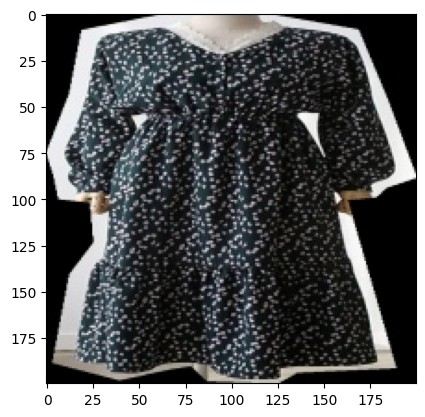

In [ ]:
plt.imshow(img_test)
plt.show()

In [ ]:
label_test

{'Img_Width': 200,
 'Img_Height': 200,
 'Rect_Seg': {'Onepiece': {'X': 321.06,
   'Y': 68.4111,
   'Width': 303,
   'Height': 726}},
 'Poly_Seg': {'Onepiece': [[419, 69],
   [508, 71],
   [577, 100],
   [601, 237],
   [625, 391],
   [600, 411],
   [592, 429],
   [568, 435],
   [608, 765],
   [527, 774],
   [511, 795],
   [453, 791],
   [440, 761],
   [423, 767],
   [381, 789],
   [326, 755],
   [340, 581],
   [360, 518],
   [357, 440],
   [331, 433],
   [327, 387],
   [321, 342],
   [340, 225],
   [350, 101],
   [420, 68]]},
 'Labeling': 'Feminine'}

In [ ]:
label_test['Labeling']

'Feminine'

# 모델 작성

In [ ]:
# 레이어 이름을 알기 위해
base_model = keras.models.load_model(base_model_path)
base_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_27 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

In [ ]:
class FeatureExtractor:
  def __init__(self):
    base_model = keras.models.load_model(base_model_path)
    self.model = keras.Model(inputs=base_model.input, outputs=base_model.get_layer('dense_14').output)

  def summary(self):
    self.model.summary()

  def extract(self, img):
    # 이미지는 이미 200x200 사이즈로 입력
    x = np.expand_dims(img, axis=0) # 입력 차원을 맞추기 위해
    feature = self.model.predict(x, verbose=0)[0]
    return feature / np.linalg.norm(feature)


In [ ]:
feature_model = FeatureExtractor()
feature_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d_30 (Conv2D)          (None, 200, 200, 64)      4864      
                                                                 
 dropout_27 (Dropout)        (None, 200, 200, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 200, 200, 64)      36928     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 100, 100, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_32 (Conv2D)          (None, 100, 100, 128)     73856     
                                                           

# 유사 이미지 탐색

In [ ]:
# 테스트 이미지에서 feature 추출
query = feature_model.extract(img_test)

# 축적 데이터셋의 feature와 비교
dists = np.linalg.norm(fe_original - query, axis=1)

# 유사도가 높은 상위 20개 이미지의 index 추출
ids = np.argsort(dists)[:20]

print(ids)

[ 353 1932 5616 5372 1946 7458  664 1997 7295 4181 5489 5492 7678  462
 1937 6112  451 5309 7794 4329]


# 결과 출력

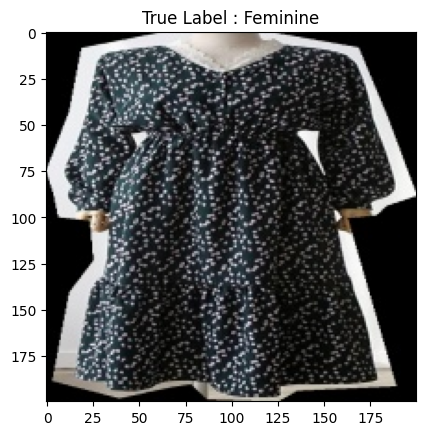

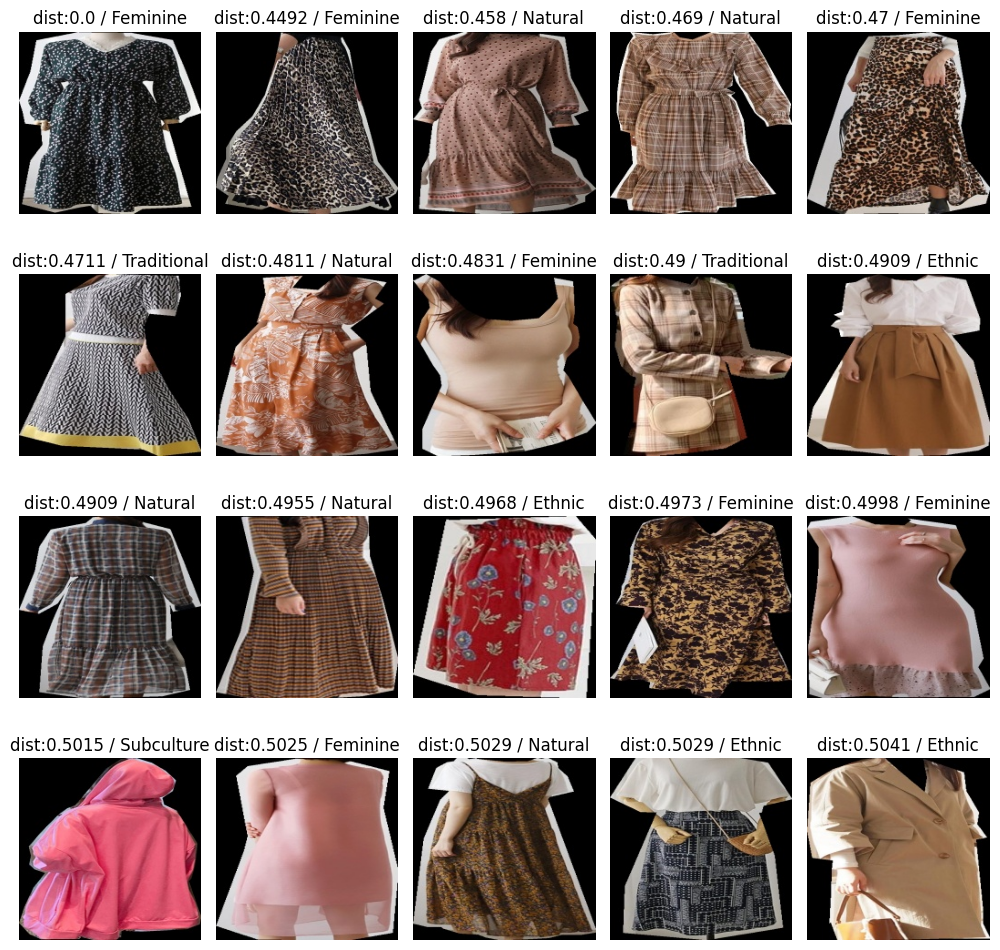

In [ ]:
# 입력 이미지 출력
plt.imshow(img_test)
plt.title("True Label : " + label_test['Labeling'])
plt.show()

# 유사 이미지 출력
axes = []
fig = plt.figure(figsize=(10,10))
for i in range(20):
    dist = dists[ids[i]]
    label = label_original[ids[i]]

    axes.append(fig.add_subplot(4, 5, i+1))
    subplot_title = 'dist:' + str(round(dist,4)) + " / " + label_original[ids[i]]['Labeling']
    axes[-1].set_title(subplot_title)
    plt.axis('off')
    plt.imshow(img_original[ids[i]])

fig.tight_layout()
plt.show()